Working with sequences

In [29]:
import re
import numpy as np

Load the data, and convert it into a string representation.

In [2]:
with open("../../data/timemachine.txt", 'r') as f:
    data = f.read()

data[0:50]

'The Time Machine, by H. G. Wells [1898]\n\nI\n\n\nThe T'

(preprocessing, removing capitalization and uppercase letters)

In [3]:
text = re.sub('[^A-Za-z]+', ' ', data).lower() # ^ means not. 
text[0:100]

'the time machine by h g wells i the time traveller for so it will be convenient to speak of him was '

Split strings into tokens (words or characters)

In this case, we'll do characters

In [4]:
tokens = list(text)

print(','.join(tokens)) # the string representation of the tokens.

t,h,e, ,t,i,m,e, ,m,a,c,h,i,n,e, ,b,y, ,h, ,g, ,w,e,l,l,s, ,i, ,t,h,e, ,t,i,m,e, ,t,r,a,v,e,l,l,e,r, ,f,o,r, ,s,o, ,i,t, ,w,i,l,l, ,b,e, ,c,o,n,v,e,n,i,e,n,t, ,t,o, ,s,p,e,a,k, ,o,f, ,h,i,m, ,w,a,s, ,e,x,p,o,u,n,d,i,n,g, ,a, ,r,e,c,o,n,d,i,t,e, ,m,a,t,t,e,r, ,t,o, ,u,s, ,h,i,s, ,g,r,e,y, ,e,y,e,s, ,s,h,o,n,e, ,a,n,d, ,t,w,i,n,k,l,e,d, ,a,n,d, ,h,i,s, ,u,s,u,a,l,l,y, ,p,a,l,e, ,f,a,c,e, ,w,a,s, ,f,l,u,s,h,e,d, ,a,n,d, ,a,n,i,m,a,t,e,d, ,t,h,e, ,f,i,r,e, ,b,u,r,n,e,d, ,b,r,i,g,h,t,l,y, ,a,n,d, ,t,h,e, ,s,o,f,t, ,r,a,d,i,a,n,c,e, ,o,f, ,t,h,e, ,i,n,c,a,n,d,e,s,c,e,n,t, ,l,i,g,h,t,s, ,i,n, ,t,h,e, ,l,i,l,i,e,s, ,o,f, ,s,i,l,v,e,r, ,c,a,u,g,h,t, ,t,h,e, ,b,u,b,b,l,e,s, ,t,h,a,t, ,f,l,a,s,h,e,d, ,a,n,d, ,p,a,s,s,e,d, ,i,n, ,o,u,r, ,g,l,a,s,s,e,s, ,o,u,r, ,c,h,a,i,r,s, ,b,e,i,n,g, ,h,i,s, ,p,a,t,e,n,t,s, ,e,m,b,r,a,c,e,d, ,a,n,d, ,c,a,r,e,s,s,e,d, ,u,s, ,r,a,t,h,e,r, ,t,h,a,n, ,s,u,b,m,i,t,t,e,d, ,t,o, ,b,e, ,s,a,t, ,u,p,o,n, ,a,n,d, ,t,h,e,r,e, ,w,a,s, ,t,h,a,t, ,l,u,x,u,r,i,o,u,s, ,a,f,t,e,

Build a vocabulary dictionary, with each token in the vocab corresponding to an index

In [5]:
vocab = set(tokens)
vocab.add('<unk>')

vocab = sorted(vocab, key = lambda x: (not x.isalpha(), x))

print(vocab)


['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ', '<unk>']


In [6]:
def get_idxs(vocab):
    vocab_idxs_dict = {}
    for i, word in enumerate(vocab):
         vocab_idxs_dict[word] = i
         
    return vocab_idxs_dict

vocab_dict = get_idxs(vocab) 

In [7]:
import pprint

pprint.pprint(vocab_dict, sort_dicts=False)

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 ' ': 26,
 '<unk>': 27}


In [ ]:
with open('../data/vocab.txt', 'w') as f:
    
    f.write()

Convert text into sequences of numerical indices, based on the voabulary dict

In [8]:
def tokens_2_num(tokens, vocab_idxs_dict):
    tokens_num = [ ]
    for i in tokens:
        num = vocab_idxs_dict[i]
        tokens_num.append(num)

    return tokens_num
        
tokens_num = tokens_2_num(tokens, vocab_dict)

def tokens_num_pairs(tokens, tokens_num):
   
    token_num_pair = [ ]
    
    token_len = len(tokens)
    
    for i in range(token_len):
        
        token_num_pair.append((tokens[i], tokens_num[i]))
        
    return token_num_pair
        

token_num_pair =tokens_num_pairs(tokens, tokens_num)

print(tokens_num[0:10])
print(tokens[0:10], '\n')
pprint.pprint(token_num_pair[0:10])
    

[19, 7, 4, 26, 19, 8, 12, 4, 26, 12]
['t', 'h', 'e', ' ', 't', 'i', 'm', 'e', ' ', 'm'] 

[('t', 19),
 ('h', 7),
 ('e', 4),
 (' ', 26),
 ('t', 19),
 ('i', 8),
 ('m', 12),
 ('e', 4),
 (' ', 26),
 ('m', 12)]


In [9]:
print(tokens[0:1000])
print(tokens_num[0:1000])

['t', 'h', 'e', ' ', 't', 'i', 'm', 'e', ' ', 'm', 'a', 'c', 'h', 'i', 'n', 'e', ' ', 'b', 'y', ' ', 'h', ' ', 'g', ' ', 'w', 'e', 'l', 'l', 's', ' ', 'i', ' ', 't', 'h', 'e', ' ', 't', 'i', 'm', 'e', ' ', 't', 'r', 'a', 'v', 'e', 'l', 'l', 'e', 'r', ' ', 'f', 'o', 'r', ' ', 's', 'o', ' ', 'i', 't', ' ', 'w', 'i', 'l', 'l', ' ', 'b', 'e', ' ', 'c', 'o', 'n', 'v', 'e', 'n', 'i', 'e', 'n', 't', ' ', 't', 'o', ' ', 's', 'p', 'e', 'a', 'k', ' ', 'o', 'f', ' ', 'h', 'i', 'm', ' ', 'w', 'a', 's', ' ', 'e', 'x', 'p', 'o', 'u', 'n', 'd', 'i', 'n', 'g', ' ', 'a', ' ', 'r', 'e', 'c', 'o', 'n', 'd', 'i', 't', 'e', ' ', 'm', 'a', 't', 't', 'e', 'r', ' ', 't', 'o', ' ', 'u', 's', ' ', 'h', 'i', 's', ' ', 'g', 'r', 'e', 'y', ' ', 'e', 'y', 'e', 's', ' ', 's', 'h', 'o', 'n', 'e', ' ', 'a', 'n', 'd', ' ', 't', 'w', 'i', 'n', 'k', 'l', 'e', 'd', ' ', 'a', 'n', 'd', ' ', 'h', 'i', 's', ' ', 'u', 's', 'u', 'a', 'l', 'l', 'y', ' ', 'p', 'a', 'l', 'e', ' ', 'f', 'a', 'c', 'e', ' ', 'w', 'a', 's', ' ', 'f',

In [10]:
from collections import Counter

token_count = dict(Counter(text)) # frequency of character tokens in the text

In [11]:
text_words = text.split() # converting the text into a list of words.

def construct_word_vocab(text_words):
    
    word_vocab = set(text_words)
    word_vocab.add('<unk>') 
    
    return word_vocab

def count_vocab_freqs_in_text(text_words):
    
    vocab_freq_in_text = dict(Counter(text_words))
    vocab_freq_in_text = dict(sorted(vocab_freq_in_text.items(), key = lambda item: item[1], reverse=True))
  
    word_freq_list = []
   
    for key, value in vocab_freq_in_text.items():
        
        word_freq_list.append((key, value)) 
    
    return word_freq_list
    
word_vocab = construct_word_vocab(text_words)
vocab_freq_in_text = count_vocab_freqs_in_text(text_words)


In [12]:
print(f"Vocab Size: {len(word_vocab)}\n")
print(f"Top 10 Vocab Word Frequency in the Text:\n")
pprint.pprint(vocab_freq_in_text[0:10])

Vocab Size: 4580

Top 10 Vocab Word Frequency in the Text:

[('the', 2261),
 ('i', 1267),
 ('and', 1245),
 ('of', 1155),
 ('a', 816),
 ('to', 695),
 ('was', 552),
 ('in', 541),
 ('that', 443),
 ('my', 440)]


The top 10 words aren't that descriptive, they're moreso what we call stopwords. 

Text(0, 0.5, 'Frequency')

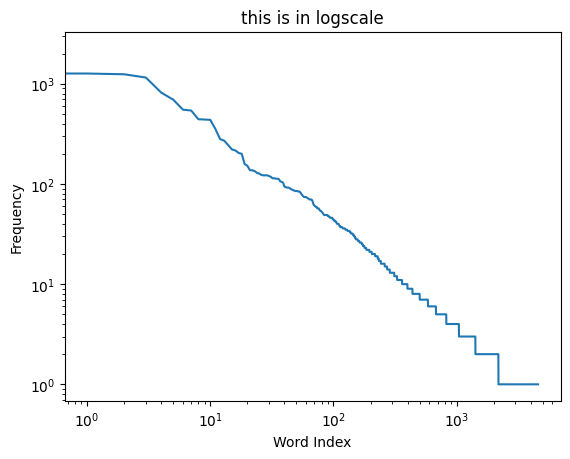

In [13]:
from matplotlib import pyplot as plt

index = [idx for idx, _ in enumerate(vocab_freq_in_text)]
frequency = [freq for _, freq in vocab_freq_in_text]

plt.plot(index, frequency, label = 'Unigram Frequency')
plt.xscale('log')
plt.yscale('log')
plt.title('this is in logscale')
plt.xlabel('Word Index')
plt.ylabel('Frequency')


The further down we go in 


```math

[('the', 2261), \\ 
 ('i', 1267), \\
 ('and', 1245), \\
 ('of', 1155), \\
 ('a', 816), \\ 
 ('to', 695), \\
 ('was', 552), \\
 ('in', 541), \\
 ('that', 443), \\
 ('my', 440), \\
\vdots

 ```

 it's easily seen that we're exponentially decreasing in terms of word frequency.

 note that the top most words are common stop-words -- the words that are more complex are exponentially less frequent than the stopwords.

in older text classifiers, they were filtered out -- but in modern RNN and Transformers, we don't need to filter them out. Similar to convnets, modern day models are able to easily extract relevant features at earlier layers.

this follow's zifp's law, $n_i \propto \frac{1}{i^{\alpha}}$, where it's saying that the frequency of the $ith$ word ($n$) is proportional to $\frac{1}{i}$ where $i$ is the index of the word $n$.

For the 3rd word, $i = 3$, $n_3$ is proportional to $\frac{1}{3}$ the frequency of the first word.

Of course, we can control this with a higher value of $\alpha$, where $\alpha > 1$ indicates a steeper decrease of frequency as $i \rightarrow V$, where $V$ is the size of the vocabulary.

This law typically holds for $n$-grams, but tends to diminish in it's accuracy as $n$ increases.

This is as, given that for larger $n$, the probability that a given sequence $S_n$ will hold non-stopwords increases, and thereby, the uniqueness for each $n$-gram increases as $n$ increases.

In [14]:
bigrams = list(zip(text_words, text_words[1:]))

print(bigrams)

for i, word_pair in enumerate(bigrams):
    
    bigrams[i] = ('-').join(word_pair)    

bigram_freq = dict(sorted(dict(Counter(bigrams)).items(), key = lambda item: item[1], reverse=True))


[('the', 'time'), ('time', 'machine'), ('machine', 'by'), ('by', 'h'), ('h', 'g'), ('g', 'wells'), ('wells', 'i'), ('i', 'the'), ('the', 'time'), ('time', 'traveller'), ('traveller', 'for'), ('for', 'so'), ('so', 'it'), ('it', 'will'), ('will', 'be'), ('be', 'convenient'), ('convenient', 'to'), ('to', 'speak'), ('speak', 'of'), ('of', 'him'), ('him', 'was'), ('was', 'expounding'), ('expounding', 'a'), ('a', 'recondite'), ('recondite', 'matter'), ('matter', 'to'), ('to', 'us'), ('us', 'his'), ('his', 'grey'), ('grey', 'eyes'), ('eyes', 'shone'), ('shone', 'and'), ('and', 'twinkled'), ('twinkled', 'and'), ('and', 'his'), ('his', 'usually'), ('usually', 'pale'), ('pale', 'face'), ('face', 'was'), ('was', 'flushed'), ('flushed', 'and'), ('and', 'animated'), ('animated', 'the'), ('the', 'fire'), ('fire', 'burned'), ('burned', 'brightly'), ('brightly', 'and'), ('and', 'the'), ('the', 'soft'), ('soft', 'radiance'), ('radiance', 'of'), ('of', 'the'), ('the', 'incandescent'), ('incandescent', '

In [15]:
bigram_freq

{'of-the': 309,
 'in-the': 169,
 'i-had': 130,
 'i-was': 112,
 'and-the': 109,
 'the-time': 102,
 'it-was': 99,
 'to-the': 85,
 'as-i': 78,
 'of-a': 73,
 'i-saw': 68,
 'i-could': 67,
 'and-i': 62,
 'in-a': 61,
 'that-i': 61,
 'time-traveller': 60,
 'for-the': 51,
 'to-me': 51,
 'into-the': 49,
 'at-the': 49,
 'from-the': 47,
 'of-my': 47,
 'upon-the': 46,
 'for-a': 45,
 'on-the': 45,
 'i-felt': 45,
 'that-the': 44,
 'was-a': 44,
 'with-a': 41,
 'said-the': 40,
 'in-my': 40,
 'time-machine': 39,
 'was-the': 39,
 'then-i': 39,
 'the-morlocks': 39,
 'seemed-to': 37,
 'to-be': 36,
 'had-been': 36,
 'the-same': 36,
 'there-was': 34,
 'out-of': 34,
 'and-then': 34,
 'by-the': 32,
 'but-i': 32,
 'a-little': 31,
 'the-little': 30,
 'they-were': 30,
 'with-the': 30,
 'i-found': 30,
 'i-have': 29,
 'all-the': 28,
 'at-last': 28,
 'me-i': 28,
 'the-machine': 27,
 'i-thought': 27,
 'the-sun': 27,
 'i-did': 27,
 'it-seemed': 26,
 'me-and': 26,
 'through-the': 26,
 'the-psychologist': 25,
 'my-mind'

In [16]:
trigrams = list(zip(text_words, text_words[1:], text_words[2:]))

for i, trigram in enumerate(trigrams):
    
    trigrams[i] = '-'.join(trigram)

trigram_freq = dict(sorted(dict(Counter(trigrams)).items(), key=lambda item: item[1], reverse=True))

In [17]:
trigram_freq

{'the-time-traveller': 59,
 'the-time-machine': 30,
 'the-medical-man': 24,
 'it-seemed-to': 16,
 'it-was-a': 15,
 'here-and-there': 15,
 'seemed-to-me': 14,
 'i-did-not': 14,
 'i-saw-the': 13,
 'i-began-to': 13,
 'for-a-moment': 12,
 'said-the-time': 12,
 'out-of-the': 12,
 'i-could-see': 12,
 'a-kind-of': 11,
 'said-the-medical': 11,
 'one-of-the': 11,
 'i-saw-a': 11,
 'and-i-was': 11,
 'i-could-not': 11,
 'the-little-people': 11,
 'i-had-a': 10,
 'to-me-that': 10,
 'i-don-t': 10,
 'the-white-sphinx': 10,
 'that-i-was': 10,
 'i-thought-of': 9,
 'i-did-so': 9,
 'that-i-had': 9,
 'i-had-seen': 9,
 'in-the-end': 9,
 'must-have-been': 9,
 'of-the-morlocks': 9,
 'it-must-have': 8,
 'there-was-a': 8,
 'that-it-was': 8,
 'it-was-the': 8,
 'of-the-little': 8,
 'of-the-time': 8,
 'as-it-seemed': 8,
 'and-then-i': 8,
 'at-the-time': 8,
 'time-machine-and': 8,
 'a-moment-i': 8,
 'as-i-did': 8,
 'i-determined-to': 8,
 'i-tried-to': 8,
 'palace-of-green': 8,
 'of-green-porcelain': 8,
 'in-a-momen

In [18]:
print(len(bigram_freq))
print(len(trigram_freq))

b_freq = [freq for freq in bigram_freq.values()]
b_idx = [i for i, _ in enumerate(bigram_freq)]

t_freq = [freq for freq in trigram_freq.values()]
t_idx = [i for i, _ in enumerate(trigram_freq)]

20234
29882


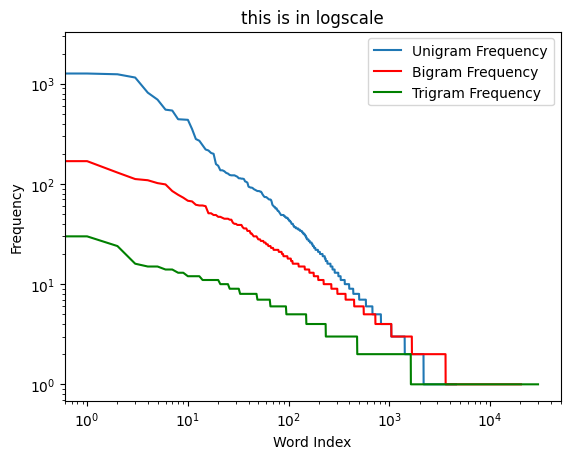

In [19]:
plt.plot(index, frequency, label = 'Unigram Frequency')
plt.xscale('log')
plt.yscale('log')
plt.title('this is in logscale')
plt.xlabel('Word Index')
plt.ylabel('Frequency')
plt.plot(b_idx, b_freq, color = 'red', label = 'Bigram Frequency')
plt.plot(t_idx, t_freq, color = 'green', label = 'Trigram Frequency')
plt.legend()

It's clear that zipf's law holds to a certain extent, but with a decreasing $\alpha$ as $n$ increases.

It appears that Zipf's law holds more prominently when $n = 1$.

But you want to consider zipf's law for any type of $n$-gram modelling or even when dealing with subwords.

Subword tokenization becomes important to deal with negative consequences of Zipf's law, such that we don't deal with rare words. A subword of a relatively rare word, such as "unhappiness" appears in many other words, such as "unseen", "happy", "happiness", etc, such that the Zipfian curve tends to smooth down over time.

In [20]:
def tokenize_into_subwords(text, subword_length=3):
    words = text.strip().split()
    subwords = []
    
    for word in words:
        for i in range(0, len(word), subword_length):
            subword = word[i:i+subword_length]
            if len(subword) > 1:  # Only include subwords of length > 1
                subwords.append(subword)
    
    return subwords

text_subwords = tokenize_into_subwords(text)
print(text_subwords[0:100])


['the', 'tim', 'mac', 'hin', 'by', 'wel', 'ls', 'the', 'tim', 'tra', 'vel', 'ler', 'for', 'so', 'it', 'wil', 'be', 'con', 'ven', 'ien', 'to', 'spe', 'ak', 'of', 'him', 'was', 'exp', 'oun', 'din', 'rec', 'ond', 'ite', 'mat', 'ter', 'to', 'us', 'his', 'gre', 'eye', 'sho', 'ne', 'and', 'twi', 'nkl', 'ed', 'and', 'his', 'usu', 'all', 'pal', 'fac', 'was', 'flu', 'she', 'and', 'ani', 'mat', 'ed', 'the', 'fir', 'bur', 'ned', 'bri', 'ght', 'ly', 'and', 'the', 'sof', 'rad', 'ian', 'ce', 'of', 'the', 'inc', 'and', 'esc', 'ent', 'lig', 'hts', 'in', 'the', 'lil', 'ies', 'of', 'sil', 'ver', 'cau', 'ght', 'the', 'bub', 'ble', 'tha', 'fla', 'she', 'and', 'pas', 'sed', 'in', 'our', 'gla']


In [21]:
subword_freq = dict(sorted(dict(Counter(text_subwords)).items(), key = lambda item: item[1], reverse=True))
pprint.pprint(list(subword_freq.items())[0:10])
print()
pprint.pprint(list(subword_freq.items())[-10:-1])

[('the', 3002),
 ('and', 1247),
 ('of', 1155),
 ('to', 702),
 ('in', 620),
 ('was', 564),
 ('tha', 482),
 ('it', 458),
 ('my', 442),
 ('ed', 426)]

[('psa', 1),
 ('hoa', 1),
 ('azi', 1),
 ('pub', 1),
 ('nca', 1),
 ('mr', 1),
 ('ryb', 1),
 ('phr', 1),
 ('lak', 1)]


In [22]:
sw_freq = [freq for freq in subword_freq.values()]
sw_idx = [i for i, _ in enumerate(subword_freq)]

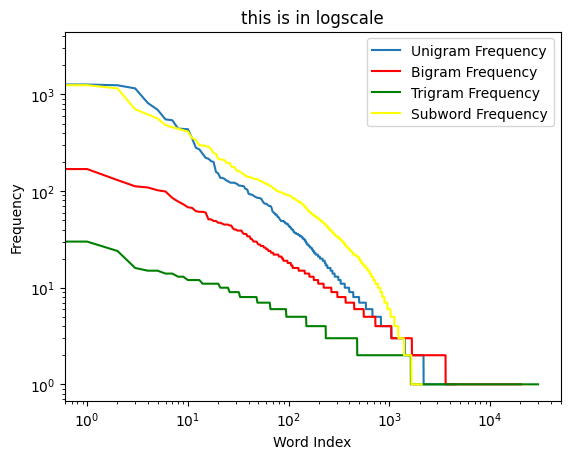

In [23]:
plt.xscale('log')
plt.yscale('log')
plt.title('this is in logscale')
plt.xlabel('Word Index')
plt.ylabel('Frequency')
plt.plot(index, frequency, label = 'Unigram Frequency')
plt.plot(b_idx, b_freq, color = 'red', label = 'Bigram Frequency')
plt.plot(t_idx, t_freq, color = 'green', label = 'Trigram Frequency')
plt.plot(sw_idx, sw_freq, color = 'yellow', label = 'Subword Frequency')
plt.legend()

Vocab Size: 4579

Top 10 Vocab Word Frequency in the Text:

[('the', 2261),
 ('i', 1267),
 ('and', 1245),
 ('of', 1155),
 ('a', 816),
 ('to', 695),
 ('was', 552),
 ('in', 541),
 ('that', 443),
 ('my', 440)]


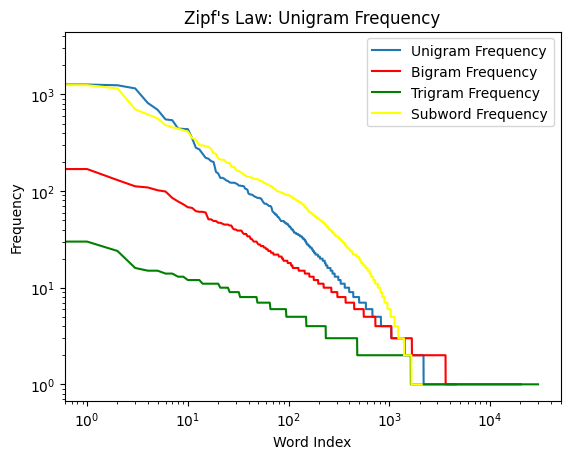

In [24]:
import re
from collections import Counter
from matplotlib import pyplot as plt
import pprint

with open("../../data/timemachine.txt", 'r') as f:
    data = f.read()

text = re.sub('[^A-Za-z]+', ' ', data).lower()

tokens = list(text)
text_words = text.split()

vocab = sorted(set(tokens), key=lambda x: (not x.isalpha(), x))
vocab_dict = {word: idx for idx, word in enumerate(vocab)}

tokens_num = [vocab_dict[token] for token in tokens]

token_count = dict(Counter(text))
word_vocab = set(text_words)
vocab_freq_in_text = dict(Counter(text_words))
vocab_freq_in_text = dict(sorted(vocab_freq_in_text.items(), key=lambda item: item[1], reverse=True))

print(f"Vocab Size: {len(word_vocab)}\n")
print(f"Top 10 Vocab Word Frequency in the Text:\n")
pprint.pprint(list(vocab_freq_in_text.items())[:10])

index = list(range(len(vocab_freq_in_text)))
frequency = [freq for _, freq in vocab_freq_in_text.items()]

plt.plot(index, frequency, label='Unigram Frequency')
plt.xscale('log')
plt.yscale('log')
plt.title('Zipf\'s Law: Unigram Frequency')
plt.xlabel('Word Index')
plt.ylabel('Frequency')

bigrams = ['-'.join(pair) for pair in zip(text_words, text_words[1:])]
trigrams = ['-'.join(triplet) for triplet in zip(text_words, text_words[1:], text_words[2:])]

bigram_freq = dict(sorted(Counter(bigrams).items(), key=lambda item: item[1], reverse=True))
trigram_freq = dict(sorted(Counter(trigrams).items(), key=lambda item: item[1], reverse=True))

b_freq = list(bigram_freq.values())
b_idx = list(range(len(bigram_freq)))

t_freq = list(trigram_freq.values())
t_idx = list(range(len(trigram_freq)))

plt.plot(b_idx, b_freq, color='red', label='Bigram Frequency')
plt.plot(t_idx, t_freq, color='green', label='Trigram Frequency')

def tokenize_into_subwords(text, subword_length=3):
    words = text.strip().split()
    subwords = []
    for word in words:
        for i in range(0, len(word), subword_length):
            subword = word[i:i+subword_length]
            if len(subword) > 1:
                subwords.append(subword)
    return subwords

text_subwords = tokenize_into_subwords(text)
subword_freq = dict(sorted(Counter(text_subwords).items(), key=lambda item: item[1], reverse=True))

sw_freq = list(subword_freq.values())
sw_idx = list(range(len(subword_freq)))

plt.plot(sw_idx, sw_freq, color='yellow', label='Subword Frequency')
plt.legend()
plt.show()


we want to extract sequence target pairs.

In [28]:
print(tokens_num[0:100])

[19, 7, 4, 26, 19, 8, 12, 4, 26, 12, 0, 2, 7, 8, 13, 4, 26, 1, 24, 26, 7, 26, 6, 26, 22, 4, 11, 11, 18, 26, 8, 26, 19, 7, 4, 26, 19, 8, 12, 4, 26, 19, 17, 0, 21, 4, 11, 11, 4, 17, 26, 5, 14, 17, 26, 18, 14, 26, 8, 19, 26, 22, 8, 11, 11, 26, 1, 4, 26, 2, 14, 13, 21, 4, 13, 8, 4, 13, 19, 26, 19, 14, 26, 18, 15, 4, 0, 10, 26, 14, 5, 26, 7, 8, 12, 26, 22, 0, 18, 26]


assuming sequence of: "the time machine by h g wells".

we want to preprocess 

In [79]:
n = 5 # sequence length

X = []
Y = []


for i in range(len(tokens_num)):
   
    X_window = tokens_num[i * n : i * n + n]
    Y_window = tokens_num[ i * n + 1 : 1 + i * n + n]
   
    if len(Y_window) != len(X_window):
        break 
    
    X.append(tokens_num[i * n : i * n + n])
    Y.append(tokens_num[i * n + 1 : 1 + i * n + n])

X = np.array(X) 
Y = np.array(Y)

print(f"X Shape: {X.shape}")
print(f"Y Shape: {Y.shape}")

X Shape: (34685, 5)
Y Shape: (34685, 5)


In [80]:
print(f"Tokens: {tokens_num[0:100]}")
print()
print(f"X0: {X[0]}")
print(f"Y0: {Y[0]}")
print()
print(f"X1: {X[1]}")
print(f"Y1: {Y[1]}")

Tokens: [19, 7, 4, 26, 19, 8, 12, 4, 26, 12, 0, 2, 7, 8, 13, 4, 26, 1, 24, 26, 7, 26, 6, 26, 22, 4, 11, 11, 18, 26, 8, 26, 19, 7, 4, 26, 19, 8, 12, 4, 26, 19, 17, 0, 21, 4, 11, 11, 4, 17, 26, 5, 14, 17, 26, 18, 14, 26, 8, 19, 26, 22, 8, 11, 11, 26, 1, 4, 26, 2, 14, 13, 21, 4, 13, 8, 4, 13, 19, 26, 19, 14, 26, 18, 15, 4, 0, 10, 26, 14, 5, 26, 7, 8, 12, 26, 22, 0, 18, 26]

X0: [19  7  4 26 19]
Y0: [ 7  4 26 19  8]

X1: [ 8 12  4 26 12]
Y1: [12  4 26 12  0]


each row is a sequence. idx's determine input / output pairs

In [85]:
np.savetxt('../data/train.csv', X, delimiter = ',', fmt = '%d')
np.savetxt('../data/test.csv', Y, delimiter=',', fmt='%d')